In [13]:
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [14]:
from preprocess import getdfs

train_df, valid_df = getdfs(data = 'text_seq')

In [15]:
train_df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [16]:
from preprocess import process_strings 

train_df['input_str'] = process_strings(train_df['input_str'])
valid_df['input_str'] = process_strings(valid_df['input_str'])

In [22]:
x_train = train_df['input_str'].values
x_valid = valid_df['input_str'].values
y_train = train_df['label'].values
y_valid = valid_df['label'].values

In [23]:
x_train = np.array([[int(i) for i in x] for x in x_train])
x_valid = np.array([[int(i) for i in x] for x in x_valid])

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

# Define the model
def build_lstm_model(input_length, embedding_dim=16, lstm_units=64):
    # Input: a sequence of digits (0-9)
    input_layer = layers.Input(shape=(input_length,))  # Input shape (sequence length)
    
    # Embedding layer: Each digit is embedded into a 16-dimensional space
    embedding_layer = layers.Embedding(input_dim=10, output_dim=embedding_dim, input_length=input_length)(input_layer)
    
    # LSTM layer: The LSTM processes the embedded sequence
    lstm_layer = layers.LSTM(units = lstm_units,  kernel_regularizer=regularizers.l2(0.001))(embedding_layer)
    dropout_layer = layers.Dropout(0.3)(lstm_layer)
    
    # Output layer: Dense layer with a single unit for binary classification
    output_layer = layers.Dense(1, activation='sigmoid')(lstm_layer)
    
    # Build the model
    model = models.Model(inputs=input_layer, outputs=output_layer)
    
    return model


In [35]:

# Build the LSTM model
input_length = 15  # Length of the input sequence (e.g., 50 digits)
lstm_model = build_lstm_model(input_length=input_length, lstm_units = 40)

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
lstm_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 16)         │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 40)             │         9,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,321 (36.41 KB)

 Trainable params: 9,321 (36.41 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [38]:
history = lstm_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=8,
                    callbacks=[early_stopping])

Epoch 1/20


885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5494 - loss: 0.6884 - val_accuracy: 0.6339 - val_loss: 0.6520
Epoch 2/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6259 - loss: 0.6472 - val_accuracy: 0.6217 - val_loss: 0.6402
Epoch 3/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6282 - loss: 0.6422 - val_accuracy: 0.6196 - val_loss: 0.6334
Epoch 4/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6550 - loss: 0.6282 - val_accuracy: 0.6544 - val_loss: 0.6297
Epoch 5/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6600 - loss: 0.6155 - val_accuracy: 0.6810 - val_loss: 0.6175
Epoch 6/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6722 - loss: 0.6109 - val_accuracy: 0.6667 - val_loss: 0.6105
Epoch 7/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6685 - loss: 0.6105 - val_accuracy: 0.6810 - val_loss: 0.6053
Epoch 8/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6758 - loss: 0.5922 - val_accuracy: 0.6830 - val_

In [39]:
from evaluate import plot_history

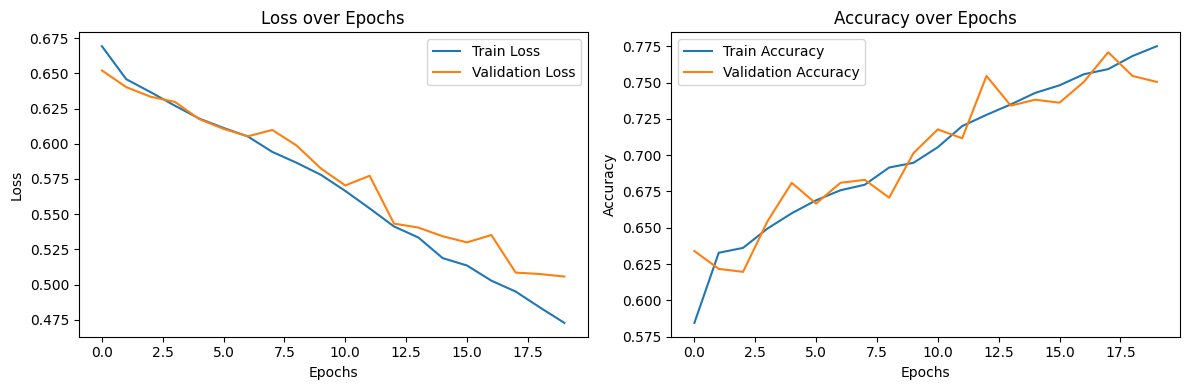

In [40]:
plot_history(history)

In [41]:
y_pred = lstm_model.predict(x_valid)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [42]:
y_pred = y_pred > 0.5

==========LSTM on Text Sequences==========
              precision    recall  f1-score   support

     Class 0       0.78      0.73      0.75       252
     Class 1       0.73      0.78      0.75       237

    accuracy                           0.75       489
   macro avg       0.75      0.75      0.75       489
weighted avg       0.75      0.75      0.75       489

Accuracy is 0.7505112474437627
==========LSTM on Text Sequences==========


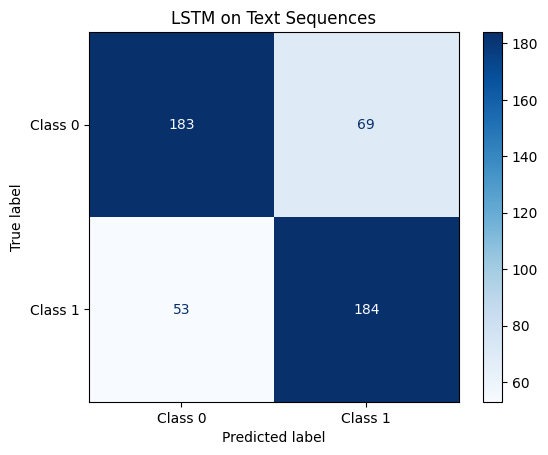

In [43]:
from evaluate import evaluate_predictions
evaluate_predictions(y_valid, y_pred, 'LSTM on Text Sequences')